In [194]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

In [2]:
DATA_DIR = 'data'

In [3]:
data_files = os.listdir(DATA_DIR)
data_files

['deliveries.jsonl', 'sessions.jsonl', 'products.jsonl', 'users.jsonl']

In [5]:
os.path.join(DATA_DIR, data_files[0])

'data/deliveries.jsonl'

In [6]:
df_deliveries = pd.read_json(os.path.join(DATA_DIR, data_files[0]), lines=True)
df_sessions = pd.read_json(os.path.join(DATA_DIR, data_files[1]), lines=True)
df_products = pd.read_json(os.path.join(DATA_DIR, data_files[2]), lines=True)
df_users = pd.read_json(os.path.join(DATA_DIR, data_files[3]), lines=True)

- ## Sessions data

In [7]:
df_sessions.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2022-03-15 07:46:34,102,1542,VIEW_PRODUCT,0.0,NaN
1,124,2022-03-15 07:49:16,102,1544,VIEW_PRODUCT,0.0,NaN
2,124,2022-03-15 07:53:27,102,1547,VIEW_PRODUCT,0.0,NaN
3,124,2022-03-15 07:56:49,102,1543,VIEW_PRODUCT,0.0,NaN
4,124,2022-03-15 07:57:17,102,1545,VIEW_PRODUCT,0.0,NaN


In [8]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47383 entries, 0 to 47382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        47383 non-null  int64         
 1   timestamp         47383 non-null  datetime64[ns]
 2   user_id           47383 non-null  int64         
 3   product_id        47383 non-null  int64         
 4   event_type        47383 non-null  object        
 5   offered_discount  46657 non-null  float64       
 6   purchase_id       7497 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 2.5+ MB


In [35]:
df_sessions['event_type'].value_counts()

VIEW_PRODUCT      39886
BUY_PRODUCT        6771
RETURN_PRODUCT      726
Name: event_type, dtype: int64

In [9]:
df_return_sessions = df_sessions[df_sessions['event_type'] == 'RETURN_PRODUCT']
df_return_sessions.head(10)

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
15,127,2022-04-17 04:55:17.731557,102,1540,RETURN_PRODUCT,NaN,20003.0
46,135,2022-03-07 16:04:08.550202,102,1629,RETURN_PRODUCT,NaN,20009.0
74,142,2022-02-21 12:12:18.948744,102,1466,RETURN_PRODUCT,NaN,20014.0
98,148,2022-04-13 06:57:56.644857,102,1471,RETURN_PRODUCT,NaN,20018.0
134,156,2022-02-10 10:01:12.534665,102,1104,RETURN_PRODUCT,NaN,20023.0
199,172,2022-02-24 22:58:34.799767,102,1095,RETURN_PRODUCT,NaN,20034.0
241,184,2022-02-24 15:04:04.413257,102,1061,RETURN_PRODUCT,NaN,20040.0
272,191,2022-02-20 03:06:07.563129,102,1440,RETURN_PRODUCT,NaN,20044.0
312,200,2022-02-25 07:19:04.599291,102,1028,RETURN_PRODUCT,NaN,20048.0
341,207,2022-02-26 10:06:44.679918,102,1610,RETURN_PRODUCT,NaN,20051.0


In [12]:
df_return_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 15 to 47289
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        726 non-null    int64         
 1   timestamp         726 non-null    datetime64[ns]
 2   user_id           726 non-null    int64         
 3   product_id        726 non-null    int64         
 4   event_type        726 non-null    object        
 5   offered_discount  0 non-null      float64       
 6   purchase_id       726 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 45.4+ KB


In [13]:
df_return_sessions.isna().sum()

session_id            0
timestamp             0
user_id               0
product_id            0
event_type            0
offered_discount    726
purchase_id           0
dtype: int64

Cleaning data

Removing redundant `offered discount` column

In [93]:
df_sessions = df_sessions.drop('offered_discount', axis=1)
df_sessions.head()

,session_id,timestamp,user_id,product_id,event_type,purchase_id
0,124,2022-03-15 07:46:34,102,1542,VIEW_PRODUCT,NaN
1,124,2022-03-15 07:49:16,102,1544,VIEW_PRODUCT,NaN
2,124,2022-03-15 07:53:27,102,1547,VIEW_PRODUCT,NaN
3,124,2022-03-15 07:56:49,102,1543,VIEW_PRODUCT,NaN
4,124,2022-03-15 07:57:17,102,1545,VIEW_PRODUCT,NaN


Datetime column

In [119]:
df_sessions['timestamp'] = pd.to_datetime(df_sessions['timestamp']).dt.date.astype('datetime64[ns]')
df_sessions.head()

,session_id,timestamp,user_id,product_id,event_type,purchase_id
0,124,2022-03-15,102,1542,VIEW_PRODUCT,NaN
1,124,2022-03-15,102,1544,VIEW_PRODUCT,NaN
2,124,2022-03-15,102,1547,VIEW_PRODUCT,NaN
3,124,2022-03-15,102,1543,VIEW_PRODUCT,NaN
4,124,2022-03-15,102,1545,VIEW_PRODUCT,NaN


In [120]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47383 entries, 0 to 47382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   session_id   47383 non-null  int64         
 1   timestamp    47383 non-null  datetime64[ns]
 2   user_id      47383 non-null  int64         
 3   product_id   47383 non-null  int64         
 4   event_type   47383 non-null  object        
 5   purchase_id  7497 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.2+ MB


- ## Products

In [16]:
df_products.head()

,product_id,product_name,category_path,price,brand,weight_kg,optional_attributes
0,1001,Fotel gamingowy Sofotel Cerber,"Akcesoria (Laptop, PC);Fotele gamingowe",619.99,Sofotel,19.0,{}
1,1002,Fotel gamingowy Sofotel Cerber,"Akcesoria (Laptop, PC);Fotele gamingowe",599.99,Sofotel,19.0,{}
2,1003,Fotel gamingowy TopEshop DORY,"Akcesoria (Laptop, PC);Fotele gamingowe",379.00,TopEshop,30.0,{}
3,1004,Fotel gamingowy Diablo Chairs WHITE BIEL BIAŁY,"Akcesoria (Laptop, PC);Fotele gamingowe",197.00,Diablo Chairs,30.0,{}
4,1005,Fotel gamingowy STERNHOFF SDH 162 B+B,"Akcesoria (Laptop, PC);Fotele gamingowe",399.00,STERNHOFF,17.0,{}


In [17]:
df_products.describe()

,product_id,price,weight_kg
count,653.000000,653.000000,653.000000
mean,1327.000000,283.225804,3.923240
std,188.649145,264.330061,16.456905
min,1001.000000,0.000000,0.000000
25%,1164.000000,68.600000,0.114000
50%,1327.000000,174.950000,0.300000
75%,1490.000000,429.000000,3.580000
max,1653.000000,999.000000,300.000000


Probably incorrect prices

In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           653 non-null    int64  
 1   product_name         653 non-null    object 
 2   category_path        653 non-null    object 
 3   price                653 non-null    float64
 4   brand                653 non-null    object 
 5   weight_kg            653 non-null    float64
 6   optional_attributes  653 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 35.8+ KB


In [19]:
sorted(df_products.brand.unique())

['A4TECH',
 'A4Tech',
 'ADATA',
 'AOC',
 'ART',
 'ASUS',
 'Acer',
 'Alio',
 'Angel',
 'Apacer',
 'Apple',
 'Asus',
 'BenQ',
 'Blow',
 'Brother',
 'CRUCIAL',
 'Cooler Master',
 'Corsair',
 'Creative',
 'Defender',
 'Dell',
 'Diablo Chairs',
 'ELPIDA',
 'Epson',
 'Esperanza',
 'Fury',
 'G.SKILL',
 'GIGABYTE',
 'GOODRAM',
 'Gembird',
 'Genesis',
 'Giosedio',
 'Goodram',
 'HP',
 'Hikvision',
 'Huawei',
 'Huzaro',
 'HyperX',
 'IMILAB',
 'Ipega',
 'Jabra',
 'Kingston',
 'LG',
 'Lenovo',
 'Logitech',
 'MSI',
 'Malatec',
 'Marvo',
 'Media-Tech',
 'Micron',
 'Microsoft',
 'Modecom',
 'Mozos',
 'Natec',
 'Onikuma',
 'PNY',
 'Patriot',
 'Philips',
 'Qoltec',
 'Ramaxel',
 'Rapoo',
 'Razer',
 'Red Fighter',
 'Roccat',
 'SK Hynix',
 'SPC GEAR',
 'SPC Gear',
 'STERNHOFF',
 'Samsung',
 'SanDisk',
 'Sennheiser',
 'Sharkoon',
 'Sofotel',
 'SpeedLink',
 'SteelSeries',
 'Thrustmaster',
 'Titanum',
 'TopEshop',
 'Tracer',
 'Trust',
 'Unitek',
 'Xiaomi',
 'eHokery',
 'iBox',
 'iMICE',
 'iiyama',
 'retoo',
 

Incorrect brand names. 
Duplicated:
- `A4TECH`
- `A4Tech`
- `ASUS`
- `asus`
- `GOODRAM`
- `Goodram`
- `SPC GEAR`
- `SPC Gear`

toLower()

In [20]:
df_products['brand'] = df_products['brand'].apply(lambda x: x.lower())

In [21]:
df_products['category_path'].unique()

array(['Akcesoria (Laptop, PC);Fotele gamingowe',
       'Akcesoria (Laptop, PC);Kamery internetowe',
       'Części do laptopów;Pamięć RAM', 'Części i akcesoria;Matryce LCD',
       'Części i akcesoria;Zasilacze LCD',
       'Kable i przedłużacze;DisplayPort', 'Klawiatury;Bezprzewodowe',
       'Klawiatury;Przewodowe', 'Komputery;Komputery stacjonarne',
       'Mikrofony i słuchawki;Słuchawki bezprzewodowe',
       'Mikrofony i słuchawki;Słuchawki przewodowe',
       'Monitory komputerowe;Monitory', 'Myszki;Bezprzewodowe',
       'Myszki;Przewodowe', 'Pamięci przenośne;Pendrive',
       'Podzespoły komputerowe;Pamięć RAM', 'Skanery;Płaskie USB',
       'Skanery;Profesjonalne', 'Tablety;Urządzenia',
       'Urządzenia VR;Gogle VR', 'Urządzenia wskazujące;Pady',
       'Zestaw klawiatura i mysz;Bezprzewodowe',
       'Zestaw klawiatura i mysz;Przewodowe'], dtype=object)

- ## Users

In [22]:
df_users

,user_id,name,city,street
0,102,Sebastian Młyńczak,Szczecin,pl. Pałacowa 584
1,103,Karina Dąbrowicz,Radom,plac Polna 13
2,104,Konrad Żelazek,Wrocław,al. Młyńska 53/86
3,105,Bruno Baumgart,Szczecin,plac Narcyzowa 29
4,106,Karina Grygorowicz,Poznań,ul. Chopina 24
...,...,...,...,...
195,297,Liwia Lamch,Kraków,ul. Topolowa 37
196,298,Dawid Hein,Wrocław,plac Klonowa 62/72
197,299,Alex Ciesielczyk,Radom,ulica Południowa 40/50
198,300,Dariusz Andruszko,Radom,al. Rubinowa 15/65


Valuable features:
- user_id
- city (optional)

In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


- ## Deliveries

In [72]:
pd.set_option('display.max_rows', 500)

In [24]:
df_deliveries

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2022-03-15T07:58:50,2022-03-19T07:59:53,516
1,20002,2022-01-10T07:10:00,2022-01-14T07:10:53,360
2,20003,2022-04-05T10:25:39,2022-04-08T10:30:08,516
3,20004,2022-03-14T01:17:51,2022-03-17T01:21:34,620
4,20005,2022-01-02T06:08:13,2022-01-04T06:10:36,516
...,...,...,...,...
6766,26767,2022-03-15T21:25:10,2022-03-17T21:28:12,620
6767,26768,2022-04-11T03:47:36,2022-04-16T03:47:59,620
6768,26769,2022-01-26T09:39:00,2022-01-31T09:42:33,516
6769,26770,2022-02-19T19:47:24,2022-02-22T19:48:19,360


In [25]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6771 entries, 0 to 6770
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   purchase_id         6771 non-null   int64 
 1   purchase_timestamp  6771 non-null   object
 2   delivery_timestamp  6771 non-null   object
 3   delivery_company    6771 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 211.7+ KB


Convert columns to datetime columns

In [73]:
df_deliveries[['purchase_timestamp', 'delivery_timestamp']] = df_deliveries[['purchase_timestamp', 'delivery_timestamp']].apply(pd.to_datetime)
df_deliveries['purchase_timestamp'] = df_deliveries['purchase_timestamp'].dt.date
df_deliveries['delivery_timestamp'] = df_deliveries['delivery_timestamp'].dt.date
df_deliveries.head()

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2022-03-15,2022-03-19,516
1,20002,2022-01-10,2022-01-14,360
2,20003,2022-04-05,2022-04-08,516
3,20004,2022-03-14,2022-03-17,620
4,20005,2022-01-02,2022-01-04,516


In [74]:
df_deliveries['delivery_timestamp'] - df_deliveries['purchase_timestamp']

0      4 days
1      4 days
2      3 days
3      3 days
4      2 days
        ...  
6766   2 days
6767   5 days
6768   5 days
6769   3 days
6770   3 days
Length: 6771, dtype: timedelta64[ns]

In [77]:
df_deliveries[['purchase_timestamp', 'delivery_timestamp']].min()

purchase_timestamp    2022-01-01
delivery_timestamp    2022-01-03
dtype: object

In [78]:
df_deliveries[['purchase_timestamp', 'delivery_timestamp']].max()

purchase_timestamp    2022-04-11
delivery_timestamp    2022-04-16
dtype: object

Posiadamy dane z ostatnich 3 miesięcy, potrzebujemy więcej danych (min z okresu jednego roku)

TODO: obliczenie średniego czasu dostawy dla danej firmy kurierskiej

In [28]:
df_deliveries.groupby('delivery_company').count()

,purchase_id,purchase_timestamp,delivery_timestamp
delivery_company,,,
360,2242,2242,2242
516,2264,2264,2264
620,2265,2265,2265


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'weight_kg'}>]], dtype=object)

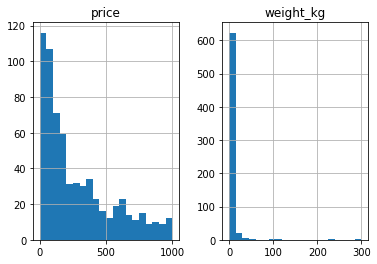

In [84]:
df_products[['price', 'weight_kg']].hist(bins=20)
# plt.xscale('log')

## Ilość zamówień i zwrotów w każdym miesiącu

In [177]:
df_sessions_analysis = df_sessions[['timestamp', 'event_type']]
df_sessions_analysis[(df_sessions_analysis['event_type'] == 'RETURN_PRODUCT') | (df_sessions_analysis['event_type'] == 'BUY_PRODUCT')]

,timestamp,event_type
5,2022-03-15,BUY_PRODUCT
7,2022-01-10,BUY_PRODUCT
14,2022-04-05,BUY_PRODUCT
15,2022-04-17,RETURN_PRODUCT
18,2022-03-14,BUY_PRODUCT
...,...,...
47348,2022-03-15,BUY_PRODUCT
47351,2022-04-11,BUY_PRODUCT
47354,2022-01-26,BUY_PRODUCT
47364,2022-02-19,BUY_PRODUCT


In [182]:
df_sessions_analysis['month'] = df_sessions_analysis['timestamp'].dt.month
df_sessions_analysis

/home/kuba/PW/IUM/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,timestamp,event_type,month
0,2022-03-15,VIEW_PRODUCT,3
1,2022-03-15,VIEW_PRODUCT,3
2,2022-03-15,VIEW_PRODUCT,3
3,2022-03-15,VIEW_PRODUCT,3
4,2022-03-15,VIEW_PRODUCT,3
...,...,...,...
47378,2022-04-09,VIEW_PRODUCT,4
47379,2022-04-09,VIEW_PRODUCT,4
47380,2022-04-09,VIEW_PRODUCT,4
47381,2022-04-09,VIEW_PRODUCT,4


In [183]:
df_sessions_analysis[['event_type', 'month']]

,event_type,month
0,VIEW_PRODUCT,3
1,VIEW_PRODUCT,3
2,VIEW_PRODUCT,3
3,VIEW_PRODUCT,3
4,VIEW_PRODUCT,3
...,...,...
47378,VIEW_PRODUCT,4
47379,VIEW_PRODUCT,4
47380,VIEW_PRODUCT,4
47381,VIEW_PRODUCT,4


In [195]:
monthly_analysis = pd.get_dummies(df_sessions_analysis[['event_type', 'month']], columns=['event_type'])
monthly_analysis

,month,event_type_BUY_PRODUCT,event_type_RETURN_PRODUCT,event_type_VIEW_PRODUCT
0,3,0,0,1
1,3,0,0,1
2,3,0,0,1
3,3,0,0,1
4,3,0,0,1
...,...,...,...,...
47378,4,0,0,1
47379,4,0,0,1
47380,4,0,0,1
47381,4,0,0,1


<AxesSubplot:xlabel='month', ylabel='count'>

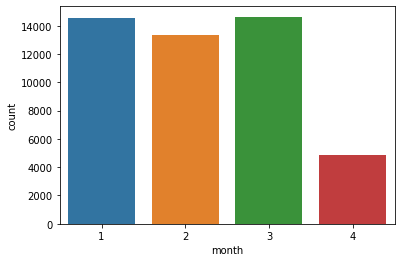

In [201]:
sns.countplot(x='month', data=monthly_analysis)

In [189]:
monthly_analysis = pd.get_dummies(df_sessions_analysis[['event_type', 'month']], columns=['event_type'])
grouped_monthly_analysis = monthly_analysis.groupby('month').sum()
grouped_monthly_analysis

,event_type_BUY_PRODUCT,event_type_RETURN_PRODUCT,event_type_VIEW_PRODUCT
month,,,
1,2140.0,100.0,12270.0
2,1863.0,405.0,11085.0
3,2095.0,147.0,12393.0
4,673.0,74.0,4138.0


In [204]:
grouped_monthly_analysis

,event_type_BUY_PRODUCT,event_type_RETURN_PRODUCT,event_type_VIEW_PRODUCT
month,,,
1,2140.0,100.0,12270.0
2,1863.0,405.0,11085.0
3,2095.0,147.0,12393.0
4,673.0,74.0,4138.0


<AxesSubplot:xlabel='month'>

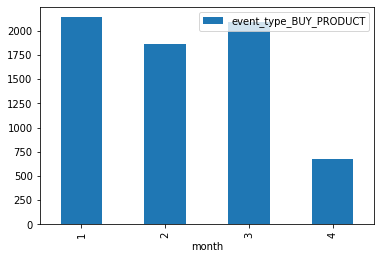

In [206]:
grouped_monthly_analysis[['event_type_BUY_PRODUCT']].plot(kind='bar')

<AxesSubplot:xlabel='month'>

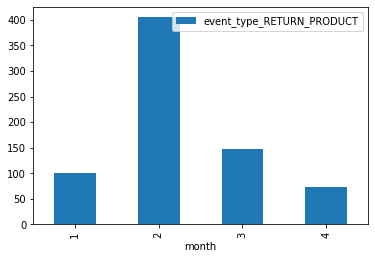

In [207]:
grouped_monthly_analysis[['event_type_RETURN_PRODUCT']].plot(kind='bar')

In [139]:
df_sessions_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47383 entries, 0 to 47382
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   47383 non-null  datetime64[ns]
 1   event_type  47383 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 740.5+ KB


In [178]:
df_sessions_analysis

,timestamp,event_type
0,2022-03-15,VIEW_PRODUCT
1,2022-03-15,VIEW_PRODUCT
2,2022-03-15,VIEW_PRODUCT
3,2022-03-15,VIEW_PRODUCT
4,2022-03-15,VIEW_PRODUCT
...,...,...
47378,2022-04-09,VIEW_PRODUCT
47379,2022-04-09,VIEW_PRODUCT
47380,2022-04-09,VIEW_PRODUCT
47381,2022-04-09,VIEW_PRODUCT


In [153]:
monthly_sessions = df_sessions_analysis.groupby(['timestamp', 'event_type']).agg({'event_type':'count'})
monthly_sessions

event_type
timestamp  event_type                
2022-01-01 BUY_PRODUCT             72
           VIEW_PRODUCT           448
2022-01-02 BUY_PRODUCT             72
           VIEW_PRODUCT           406
2022-01-03 BUY_PRODUCT             72
...                               ...
2022-04-21 RETURN_PRODUCT           1
2022-04-23 RETURN_PRODUCT           2
2022-04-24 RETURN_PRODUCT           1
2022-04-26 RETURN_PRODUCT           1
2022-04-30 RETURN_PRODUCT           1

[309 rows x 1 columns]

In [157]:
monthly_sessions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 309 entries, (Timestamp('2022-01-01 00:00:00'), 'BUY_PRODUCT') to (Timestamp('2022-04-30 00:00:00'), 'RETURN_PRODUCT')
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   event_type  309 non-null    int64
dtypes: int64(1)
memory usage: 4.0+ KB


In [131]:
df_sessions_analysis.resample('M').count()

,event_type
timestamp,
2022-01-31,14510
2022-02-28,13353
2022-03-31,14635
2022-04-30,4885
